In [13]:
#Step 3 - Climate Analysis and Exploration
#Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
#Use SQLAlchemy create_engine to connect to your sqlite database.
#Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Python SQL toolkit and Object Relational Mapper
from sqlalchemy import MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

In [9]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [10]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
#do some reflection and export our schema

['clean_hawaii_measurements.csv',
 'clean_hawaii_stations.csv',
 'measurement',
 'measurements',
 'station',
 'stations']

In [11]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)


In [12]:
inspector = inspect(engine)
inspector.get_table_names()

['clean_hawaii_measurements.csv',
 'clean_hawaii_stations.csv',
 'measurement',
 'measurements',
 'station',
 'stations']

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today
prev_year = dt.date.today() - dt.timedelta(days=365)

prev_year

datetime.date(2017, 4, 29)

In [22]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

results[0:10]

[('2017-04-29', 0.12),
 ('2017-04-30', 0.89),
 ('2017-05-01', 0.26),
 ('2017-05-02', 0.0),
 ('2017-05-03', 0.0),
 ('2017-05-04', 0.0),
 ('2017-05-05', 0.0),
 ('2017-05-06', 0.0),
 ('2017-05-07', 0.0),
 ('2017-05-08', 0.0)]

In [27]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)
df.head()

,date,precipitation
date,,
2017-04-29,2017-04-29,0.12
2017-04-30,2017-04-30,0.89
2017-05-01,2017-05-01,0.26
2017-05-02,2017-05-02,0.00
2017-05-03,2017-05-03,0.00


<IPython.core.display.Javascript object>


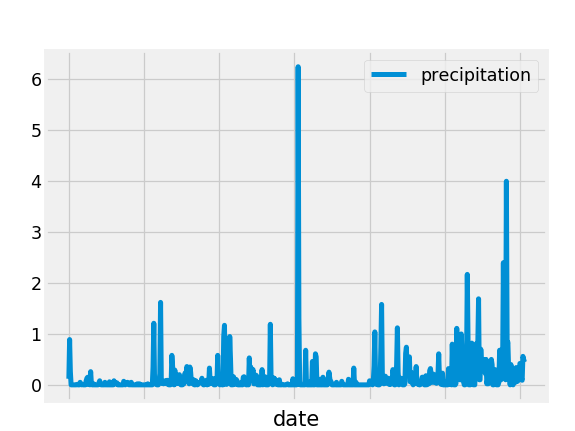

<IPython.core.display.Javascript object>


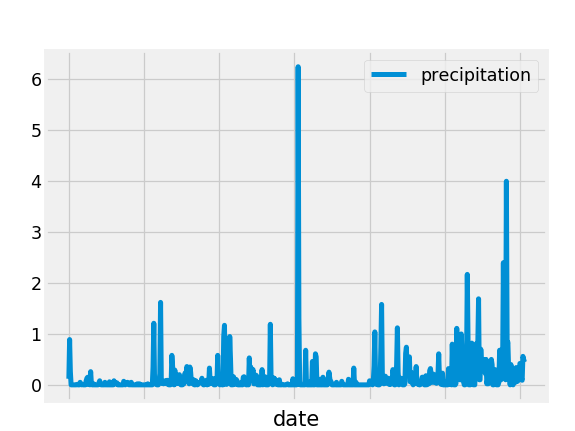

In [29]:
df.plot(x_compat=True)
plt.show()

In [ ]:
session.query(clean_csv2.station).all()

In [ ]:
engine.execute('SELECT * FROM clean_hawaii_measurements.csv LIMIT 5').fetchall()


In [ ]:
inspector = inspect(engine)
inspector.get_table_names()

In [ ]:
# Get a list of column names and types
columns = inspector.get_columns('clean_hawaii_stations.csv')
for c in columns:
    print(c['name'], c['type'])
# columns

In [ ]:
# Get a list of column names and types
columns = inspector.get_columns('clean_hawaii_measurements.csv')
for c in columns:
    print(c['name'], c['type'])
# columns

In [ ]:
# filter North American mammals whose genus is "Antilocapra"
# query, loop over and print out animals.
mammals = session.query(NA).filter(NA.genus == 'Antilocapra').all()
for mammal in mammals:
    print("Family: {0}, Genus: {1}".format(mammal.family, mammal.genus))

In [ ]:
#Precipitation Analysis
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.
#Load the query results into a Pandas DataFrame and set the index to the date column.
#Plot the results using the DataFrame plot method.


sel = [Dow.stock, 
       func.avg(Dow.open_price), 
       func.avg(Dow.high_price), 
       func.avg(Dow.low_price), 
       func.avg(Dow.close_price)]
may_averages = session.query(*sel).\
    filter(func.strftime("%m", Dow.date) == "05").\
    group_by(Dow.stock).\
    order_by(Dow.stock).all()
### END SOLUTION
may_averages



In [ ]:
#Station Analysis
#Design a query to calculate the total number of stations.
#Design a query to find the most active stations.
#List the stations and observation counts in descending order
#Which station has the highest number of observations?
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
#Plot the results as a histogram with bins=12














In [34]:
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
    
# Set the start and end date of the trip
trip_start = '2018-01-01'
trip_end = '2018-01-07'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end)

trip_dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# Stip off the year and save a list of %m-%d strings
trip_month_day = trip_dates.strftime('%m-%d')

trip_month_day

array(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07'], 
      dtype='<U5')

In [37]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_month_day:
    normals.append(*daily_normals(date))
    
normals

[(62, 69.06, 77),
 (60, 69.40816326530613, 77),
 (62, 68.83333333333333, 77),
 (58, 69.83636363636364, 76),
 (56, 68.0, 76),
 (61, 68.88679245283019, 76),
 (57, 68.38181818181818, 76)]